# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras
import tensorflow as tf
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpu_devices[0], True)

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4]
EPOCHS = 50
BATCH_SIZE = 256
opt_SGD = keras.optimizers.SGD()
opt_RMSprop = keras.optimizers.RMSprop()
opt_Adagrad = keras.optimizers.Adagrad()
opt_Adam  = keras.optimizers.Adam()
optimizers = {"SGD" : opt_SGD, "RMSprop" : opt_RMSprop, "Adagrad" : opt_Adagrad, "Adam" : opt_Adam }

In [7]:
results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:
    for opt_name in optimizers.keys():
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with LR = %.5f opt = %s" % (lr, opt_name))
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        opt = optimizers[opt_name]
        opt.learning_rate = lr
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=opt)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["accuracy"]
        valid_acc = model.history.history["val_accuracy"]

        exp_name_tag = "exp-lr-%s-%s" % (str(lr), opt_name) 
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}


Experiment with LR = 0.10000 opt = SGD
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==

Epoch 49/50
50000/50000 [==============================] - 6s 126us/step - loss: 0.7590 - accuracy: 0.7316 - val_loss: 1.8211 - val_accuracy: 0.4558
Epoch 50/50
50000/50000 [==============================] - 18s 351us/step - loss: 0.7391 - accuracy: 0.7381 - val_loss: 1.6930 - val_accuracy: 0.4915
Experiment with LR = 0.10000 opt = RMSprop
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_______________________________________________

50000/50000 [==============================] - 8s 160us/step - loss: 2.3080 - accuracy: 0.0980 - val_loss: 2.3137 - val_accuracy: 0.1000
Epoch 47/50
50000/50000 [==============================] - 6s 125us/step - loss: 2.3077 - accuracy: 0.0994 - val_loss: 2.3148 - val_accuracy: 0.1000
Epoch 48/50
50000/50000 [==============================] - 4s 89us/step - loss: 2.3084 - accuracy: 0.0961 - val_loss: 2.3131 - val_accuracy: 0.1000
Epoch 49/50
50000/50000 [==============================] - 4s 90us/step - loss: 2.3075 - accuracy: 0.0990 - val_loss: 2.3107 - val_accuracy: 0.1000
Epoch 50/50
50000/50000 [==============================] - 4s 80us/step - loss: 2.3080 - accuracy: 0.0980 - val_loss: 2.3100 - val_accuracy: 0.1000
Experiment with LR = 0.10000 opt = Adagrad
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
____________

Epoch 44/50
50000/50000 [==============================] - 4s 74us/step - loss: 1.3951 - accuracy: 0.5035 - val_loss: 1.6468 - val_accuracy: 0.4365
Epoch 45/50
50000/50000 [==============================] - 4s 81us/step - loss: 1.3935 - accuracy: 0.5042 - val_loss: 1.5448 - val_accuracy: 0.4612
Epoch 46/50
50000/50000 [==============================] - 4s 81us/step - loss: 1.3850 - accuracy: 0.5079 - val_loss: 1.5476 - val_accuracy: 0.4594
Epoch 47/50
50000/50000 [==============================] - 5s 90us/step - loss: 1.3870 - accuracy: 0.5080 - val_loss: 1.5338 - val_accuracy: 0.4649
Epoch 48/50
50000/50000 [==============================] - 5s 108us/step - loss: 1.3733 - accuracy: 0.5115 - val_loss: 1.5480 - val_accuracy: 0.4601
Epoch 49/50
50000/50000 [==============================] - 14s 273us/step - loss: 1.3747 - accuracy: 0.5099 - val_loss: 1.4852 - val_accuracy: 0.4790
Epoch 50/50
50000/50000 [==============================] - 7s 149us/step - loss: 1.3675 - accuracy: 0.5135 - 

50000/50000 [==============================] - 9s 187us/step - loss: 2.3076 - accuracy: 0.0989 - val_loss: 2.3064 - val_accuracy: 0.1000
Epoch 42/50
50000/50000 [==============================] - 12s 250us/step - loss: 2.3067 - accuracy: 0.1002 - val_loss: 2.3082 - val_accuracy: 0.1000
Epoch 43/50
50000/50000 [==============================] - 9s 190us/step - loss: 2.3066 - accuracy: 0.0998 - val_loss: 2.3067 - val_accuracy: 0.1000
Epoch 44/50
50000/50000 [==============================] - 5s 106us/step - loss: 2.3064 - accuracy: 0.1008 - val_loss: 2.3057 - val_accuracy: 0.1000
Epoch 45/50
50000/50000 [==============================] - 5s 92us/step - loss: 2.3075 - accuracy: 0.0988 - val_loss: 2.3050 - val_accuracy: 0.1000
Epoch 46/50
50000/50000 [==============================] - 5s 92us/step - loss: 2.3069 - accuracy: 0.1009 - val_loss: 2.3079 - val_accuracy: 0.1000
Epoch 47/50
50000/50000 [==============================] - 5s 91us/step - loss: 2.3063 - accuracy: 0.1011 - val_loss: 2

Epoch 39/50
50000/50000 [==============================] - 4s 71us/step - loss: 1.2978 - accuracy: 0.5436 - val_loss: 1.3966 - val_accuracy: 0.5018
Epoch 40/50
50000/50000 [==============================] - 3s 66us/step - loss: 1.2965 - accuracy: 0.5472 - val_loss: 1.4187 - val_accuracy: 0.4989
Epoch 41/50
50000/50000 [==============================] - 3s 69us/step - loss: 1.2889 - accuracy: 0.5477 - val_loss: 1.3949 - val_accuracy: 0.5084
Epoch 42/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.2813 - accuracy: 0.5485 - val_loss: 1.5780 - val_accuracy: 0.4439
Epoch 43/50
50000/50000 [==============================] - 4s 70us/step - loss: 1.2754 - accuracy: 0.5505 - val_loss: 1.4167 - val_accuracy: 0.4967
Epoch 44/50
50000/50000 [==============================] - 3s 70us/step - loss: 1.2660 - accuracy: 0.5564 - val_loss: 1.4350 - val_accuracy: 0.4911
Epoch 45/50
50000/50000 [==============================] - 4s 72us/step - loss: 1.2607 - accuracy: 0.5577 - val_

Epoch 37/50
50000/50000 [==============================] - 4s 87us/step - loss: 1.7911 - accuracy: 0.3505 - val_loss: 1.9437 - val_accuracy: 0.2976
Epoch 38/50
50000/50000 [==============================] - 4s 80us/step - loss: 1.7874 - accuracy: 0.3517 - val_loss: 1.8528 - val_accuracy: 0.3288
Epoch 39/50
50000/50000 [==============================] - 4s 80us/step - loss: 1.7882 - accuracy: 0.3538 - val_loss: 1.8129 - val_accuracy: 0.3413
Epoch 40/50
50000/50000 [==============================] - 5s 102us/step - loss: 1.7803 - accuracy: 0.3504 - val_loss: 1.7973 - val_accuracy: 0.3343
Epoch 41/50
50000/50000 [==============================] - 5s 94us/step - loss: 1.7877 - accuracy: 0.3506 - val_loss: 1.9129 - val_accuracy: 0.3070
Epoch 42/50
50000/50000 [==============================] - 5s 110us/step - loss: 1.7835 - accuracy: 0.3512 - val_loss: 1.9171 - val_accuracy: 0.3133
Epoch 43/50
50000/50000 [==============================] - 7s 142us/step - loss: 1.7848 - accuracy: 0.3538 - v

Epoch 35/50
50000/50000 [==============================] - 5s 98us/step - loss: 1.1522 - accuracy: 0.5955 - val_loss: 1.4080 - val_accuracy: 0.5174
Epoch 36/50
50000/50000 [==============================] - 6s 125us/step - loss: 1.1429 - accuracy: 0.5968 - val_loss: 1.3758 - val_accuracy: 0.5213
Epoch 37/50
50000/50000 [==============================] - 5s 103us/step - loss: 1.1354 - accuracy: 0.6015 - val_loss: 1.4300 - val_accuracy: 0.5027
Epoch 38/50
50000/50000 [==============================] - 5s 104us/step - loss: 1.1289 - accuracy: 0.6028 - val_loss: 1.4287 - val_accuracy: 0.5089
Epoch 39/50
50000/50000 [==============================] - 6s 114us/step - loss: 1.1218 - accuracy: 0.6067 - val_loss: 1.3842 - val_accuracy: 0.5162
Epoch 40/50
50000/50000 [==============================] - 4s 85us/step - loss: 1.1124 - accuracy: 0.6094 - val_loss: 1.3843 - val_accuracy: 0.5200
Epoch 41/50
50000/50000 [==============================] - 4s 77us/step - loss: 1.1030 - accuracy: 0.6120 - 

Epoch 33/50
50000/50000 [==============================] - 6s 111us/step - loss: 2.3031 - accuracy: 0.1008 - val_loss: 2.3030 - val_accuracy: 0.1000
Epoch 34/50
50000/50000 [==============================] - 9s 180us/step - loss: 2.3032 - accuracy: 0.0970 - val_loss: 2.3029 - val_accuracy: 0.1000
Epoch 35/50
50000/50000 [==============================] - 9s 175us/step - loss: 2.3032 - accuracy: 0.0992 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 36/50
50000/50000 [==============================] - 7s 146us/step - loss: 2.3031 - accuracy: 0.0986 - val_loss: 2.3030 - val_accuracy: 0.1000
Epoch 37/50
50000/50000 [==============================] - 6s 119us/step - loss: 2.3032 - accuracy: 0.0977 - val_loss: 2.3034 - val_accuracy: 0.1000
Epoch 38/50
50000/50000 [==============================] - 5s 98us/step - loss: 2.3031 - accuracy: 0.0980 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 39/50
50000/50000 [==============================] - 5s 94us/step - loss: 2.3032 - accuracy: 0.0966 -

Epoch 31/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.7623 - accuracy: 0.3862 - val_loss: 1.7623 - val_accuracy: 0.3859
Epoch 32/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.7571 - accuracy: 0.3873 - val_loss: 1.7577 - val_accuracy: 0.3872
Epoch 33/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.7525 - accuracy: 0.3894 - val_loss: 1.7522 - val_accuracy: 0.3882
Epoch 34/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.7476 - accuracy: 0.3913 - val_loss: 1.7480 - val_accuracy: 0.3919
Epoch 35/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.7429 - accuracy: 0.3919 - val_loss: 1.7438 - val_accuracy: 0.3915
Epoch 36/50
50000/50000 [==============================] - 3s 67us/step - loss: 1.7386 - accuracy: 0.3938 - val_loss: 1.7400 - val_accuracy: 0.3933
Epoch 37/50
50000/50000 [==============================] - 3s 66us/step - loss: 1.7342 - accuracy: 0.3963 - val_

Epoch 29/50
50000/50000 [==============================] - 4s 76us/step - loss: 1.0722 - accuracy: 0.6159 - val_loss: 1.5643 - val_accuracy: 0.5002
Epoch 30/50
50000/50000 [==============================] - 4s 86us/step - loss: 1.0584 - accuracy: 0.6228 - val_loss: 1.6454 - val_accuracy: 0.4907
Epoch 31/50
50000/50000 [==============================] - 5s 91us/step - loss: 1.0353 - accuracy: 0.6281 - val_loss: 1.6481 - val_accuracy: 0.4846
Epoch 32/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.0236 - accuracy: 0.6324 - val_loss: 1.6105 - val_accuracy: 0.4801
Epoch 33/50
50000/50000 [==============================] - 6s 114us/step - loss: 1.0077 - accuracy: 0.6369 - val_loss: 1.7233 - val_accuracy: 0.4712
Epoch 34/50
50000/50000 [==============================] - 6s 124us/step - loss: 0.9936 - accuracy: 0.6439 - val_loss: 1.6750 - val_accuracy: 0.4816
Epoch 35/50
50000/50000 [==============================] - 6s 111us/step - loss: 0.9772 - accuracy: 0.6486 - 

Epoch 27/50
50000/50000 [==============================] - 4s 75us/step - loss: 1.3613 - accuracy: 0.5248 - val_loss: 1.4298 - val_accuracy: 0.4889
Epoch 28/50
50000/50000 [==============================] - 4s 71us/step - loss: 1.3546 - accuracy: 0.5284 - val_loss: 1.4204 - val_accuracy: 0.4882
Epoch 29/50
50000/50000 [==============================] - 4s 71us/step - loss: 1.3489 - accuracy: 0.5304 - val_loss: 1.4318 - val_accuracy: 0.4904
Epoch 30/50
50000/50000 [==============================] - 4s 75us/step - loss: 1.3424 - accuracy: 0.5325 - val_loss: 1.4124 - val_accuracy: 0.4953
Epoch 31/50
50000/50000 [==============================] - 4s 78us/step - loss: 1.3366 - accuracy: 0.5329 - val_loss: 1.4301 - val_accuracy: 0.4912
Epoch 32/50
50000/50000 [==============================] - 4s 84us/step - loss: 1.3305 - accuracy: 0.5357 - val_loss: 1.4299 - val_accuracy: 0.4831
Epoch 33/50
50000/50000 [==============================] - 5s 98us/step - loss: 1.3249 - accuracy: 0.5373 - val_

Epoch 25/50
50000/50000 [==============================] - 5s 96us/step - loss: 1.2760 - accuracy: 0.5450 - val_loss: 1.4364 - val_accuracy: 0.4917
Epoch 26/50
50000/50000 [==============================] - 6s 118us/step - loss: 1.2707 - accuracy: 0.5466 - val_loss: 1.4198 - val_accuracy: 0.5064
Epoch 27/50
50000/50000 [==============================] - 11s 212us/step - loss: 1.2588 - accuracy: 0.5507 - val_loss: 1.4323 - val_accuracy: 0.5011
Epoch 28/50
50000/50000 [==============================] - 6s 123us/step - loss: 1.2563 - accuracy: 0.5527 - val_loss: 1.4129 - val_accuracy: 0.5034
Epoch 29/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.2407 - accuracy: 0.5569 - val_loss: 1.4351 - val_accuracy: 0.4983
Epoch 30/50
50000/50000 [==============================] - 4s 84us/step - loss: 1.2297 - accuracy: 0.5636 - val_loss: 1.4184 - val_accuracy: 0.5028
Epoch 31/50
50000/50000 [==============================] - 4s 80us/step - loss: 1.2267 - accuracy: 0.5618 -

Epoch 23/50
50000/50000 [==============================] - 6s 112us/step - loss: 2.1427 - accuracy: 0.2462 - val_loss: 2.1381 - val_accuracy: 0.2524
Epoch 24/50
50000/50000 [==============================] - 11s 215us/step - loss: 2.1375 - accuracy: 0.2497 - val_loss: 2.1330 - val_accuracy: 0.2569
Epoch 25/50
50000/50000 [==============================] - 6s 127us/step - loss: 2.1324 - accuracy: 0.2527 - val_loss: 2.1280 - val_accuracy: 0.2598
Epoch 26/50
50000/50000 [==============================] - 4s 80us/step - loss: 2.1276 - accuracy: 0.2556 - val_loss: 2.1233 - val_accuracy: 0.2629
Epoch 27/50
50000/50000 [==============================] - 4s 80us/step - loss: 2.1229 - accuracy: 0.2570 - val_loss: 2.1187 - val_accuracy: 0.2649
Epoch 28/50
50000/50000 [==============================] - 3s 67us/step - loss: 2.1183 - accuracy: 0.2600 - val_loss: 2.1142 - val_accuracy: 0.2660
Epoch 29/50
50000/50000 [==============================] - 3s 64us/step - loss: 2.1139 - accuracy: 0.2609 - 

Epoch 21/50
50000/50000 [==============================] - 4s 73us/step - loss: 1.2702 - accuracy: 0.5530 - val_loss: 1.4562 - val_accuracy: 0.4891
Epoch 22/50
50000/50000 [==============================] - 4s 83us/step - loss: 1.2623 - accuracy: 0.5557 - val_loss: 1.4661 - val_accuracy: 0.4707
Epoch 23/50
50000/50000 [==============================] - 4s 79us/step - loss: 1.2434 - accuracy: 0.5622 - val_loss: 1.3814 - val_accuracy: 0.5072
Epoch 24/50
50000/50000 [==============================] - 4s 84us/step - loss: 1.2343 - accuracy: 0.5665 - val_loss: 1.4473 - val_accuracy: 0.4833
Epoch 25/50
50000/50000 [==============================] - 5s 95us/step - loss: 1.2193 - accuracy: 0.5720 - val_loss: 1.3828 - val_accuracy: 0.5078
Epoch 26/50
50000/50000 [==============================] - 5s 97us/step - loss: 1.2058 - accuracy: 0.5768 - val_loss: 1.4413 - val_accuracy: 0.4888
Epoch 27/50
50000/50000 [==============================] - 6s 126us/step - loss: 1.1928 - accuracy: 0.5805 - val

Epoch 19/50
50000/50000 [==============================] - 4s 78us/step - loss: 1.7354 - accuracy: 0.3994 - val_loss: 1.7390 - val_accuracy: 0.3971
Epoch 20/50
50000/50000 [==============================] - 4s 77us/step - loss: 1.7309 - accuracy: 0.4008 - val_loss: 1.7350 - val_accuracy: 0.3995
Epoch 21/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.7269 - accuracy: 0.4025 - val_loss: 1.7305 - val_accuracy: 0.3999
Epoch 22/50
50000/50000 [==============================] - 6s 124us/step - loss: 1.7230 - accuracy: 0.4036 - val_loss: 1.7271 - val_accuracy: 0.4000
Epoch 23/50
50000/50000 [==============================] - 13s 257us/step - loss: 1.7193 - accuracy: 0.4049 - val_loss: 1.7248 - val_accuracy: 0.4015
Epoch 24/50
50000/50000 [==============================] - 6s 128us/step - loss: 1.7157 - accuracy: 0.4058 - val_loss: 1.7202 - val_accuracy: 0.4014
Epoch 25/50
50000/50000 [==============================] - 4s 90us/step - loss: 1.7120 - accuracy: 0.4082 -

Epoch 17/50
50000/50000 [==============================] - 5s 108us/step - loss: 1.3079 - accuracy: 0.5383 - val_loss: 1.3920 - val_accuracy: 0.5098
Epoch 18/50
50000/50000 [==============================] - 11s 225us/step - loss: 1.2935 - accuracy: 0.5430 - val_loss: 1.3873 - val_accuracy: 0.5069
Epoch 19/50
50000/50000 [==============================] - 19s 389us/step - loss: 1.2793 - accuracy: 0.5509 - val_loss: 1.3724 - val_accuracy: 0.5132
Epoch 20/50
50000/50000 [==============================] - 17s 338us/step - loss: 1.2703 - accuracy: 0.5526 - val_loss: 1.3586 - val_accuracy: 0.5189
Epoch 21/50
50000/50000 [==============================] - 11s 212us/step - loss: 1.2583 - accuracy: 0.5561 - val_loss: 1.3654 - val_accuracy: 0.5149
Epoch 22/50
50000/50000 [==============================] - 9s 172us/step - loss: 1.2411 - accuracy: 0.5626 - val_loss: 1.3781 - val_accuracy: 0.5150
Epoch 23/50
50000/50000 [==============================] - 5s 103us/step - loss: 1.2338 - accuracy: 0.

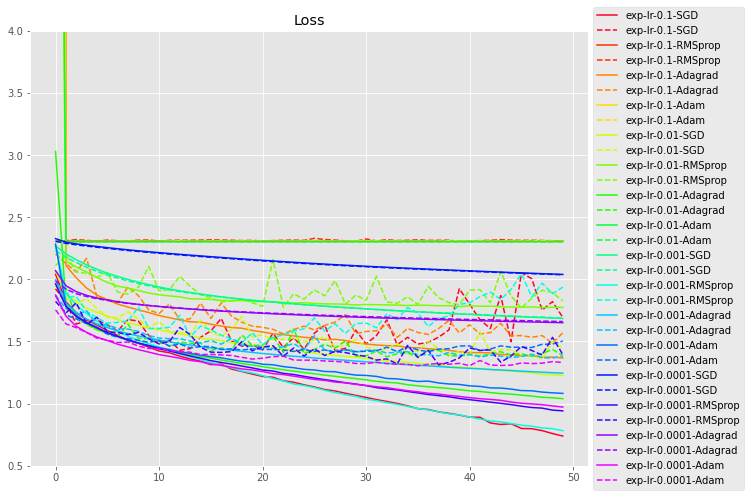

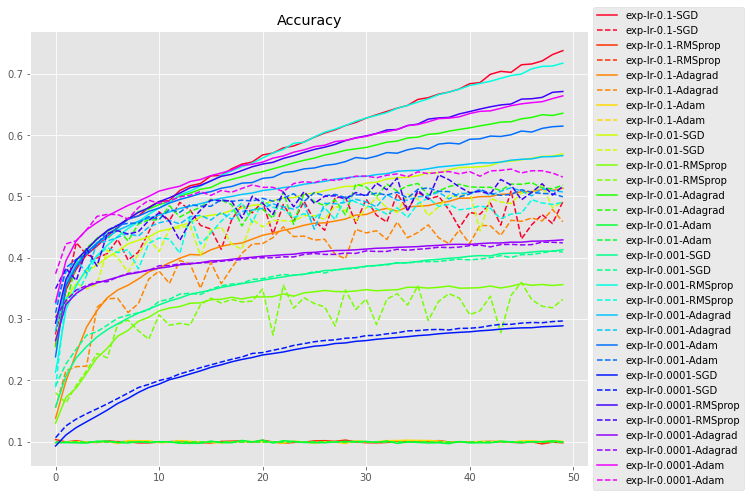

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
"""Code Here
將結果繪出
"""
    
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(10,8))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
#plt.yscale('log')
plt.ylim(0.5, 4)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(10,8))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()